In [ ]:
# Steps

1. Scrape the Data
2. Data Cleaning
3. Convert your data into DataFrame
4. Perform the Data Analysis - Data Cleaning, Data Exploration, Data Manipulation, Data Viosualization
5. Perform the EDA (Exploratory Data Analysis)

# Importing Required Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Performing the Data Scraping from the WEB

Link to site which we want to scrape: https://sofifa.com/players

In [ ]:
# Links in which our data is present

https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540

In [ ]:
# logic to print the URL for all the 10 pages
for i in range(0,541,60):
  print(f'https://sofifa.com/players?offset={i}')

In [ ]:
!apt-get update
!apt-get install chromium chromium-driver


In [112]:
#create a browser-specific (Google Chrome) web navigation simulator:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

driver = web_driver()

# URL of the page to scrape
url = 'https://sofifa.com/players?offset=0'

# Open the URL
driver.get(url)

# Wait for the page to load (adjust the time as needed)
driver.implicitly_wait(10)

# Get the page source after it's been modified by JavaScript
html_content = driver.page_source

# Create a Beautiful Soup object
soup = BeautifulSoup(html_content, "html.parser")

## Getting all required data from site

In [113]:
arr = [i for i in soup.findAll('tr')]

In [114]:
# This contains irrelivent information
del arr[0]

# Cleaning Data

In [115]:
# Image Link
re.sub('^<img.*data-srcset="| .*/>', '' , str(arr[0].find('img',{"class": "player-check"})))

'https://cdn.sofifa.net/players/237/440/23_120.png'

In [116]:
# Name
re.sub('^<a.*">|<.*>', '', str(arr[0].find('a', {"role":"tooltip"})))

'H. Delcroix'

In [117]:
# Age
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col"})))

'23'

In [118]:
# OVA
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-oa"})))

'72'

In [119]:
# POT
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-pt"})))

'77'

In [120]:
# Team
re.sub('<a.*">|<.*>', '', str(arr[0].findAll('a')[-1]))

'Anderlecht'

In [121]:
# Duration
re.sub('<div.*\n|<.*>', '', str(arr[0].find('div', {"class": "sub"})))

'2017 ~ 2024'

In [122]:
# Value
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-vl"})))

'3.2M'

In [123]:
# Wage
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-wg"})))

'13K'

In [124]:
# Total Stats
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class": "col col-tt"})))

'1662'

In [125]:
columns = ['IMAGE_LINK', 'NAME', 'AGE', 'OVA', 'POT', 'TEAM',
           'DURATION', 'VALUE', 'WAGE', 'TOTAL_STATS']

# Transforming Data into Dataframe


In [130]:
fifa_final = pd.DataFrame()

for i in range(0,541,60):
  url = f'https://sofifa.com/players?offset={i}'
  driver.get(url)
  html_content = driver.page_source
  soup = BeautifulSoup(html_content, "html.parser")
  lists = [[] for _ in range(10)]

  for i in soup.findAll('tr'):
    Image_Link = re.sub('^<img.*data-srcset="| .*/>', '' , str(i.find('img',{"class": "player-check"})))
    Name = re.sub('^<a.*">|<.*>', '', str(i.find('a', {"role":"tooltip"})))
    Age = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col"})))
    OVA = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-oa"})))
    POT = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-pt"})))
    Team = re.sub('<a.*">|<.*>', '', str(i.findAll('a')[-1]))
    Duration = re.sub('<div.*\n|<.*>', '', str(i.find('div', {"class": "sub"})))
    Value = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-vl"})))
    Wage = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-wg"})))
    Total_stats = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class": "col col-tt"})))


    lists[0].append(Image_Link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)


  fifa = pd.DataFrame({"Image_link":lists[0],
                      "Name": lists[1],
                      "Age": lists[2],
                      "OVA": lists[3],
                      "POT": lists[4],
                      "Team": lists[5],
                      "Duration": lists[6],
                      "Value": lists[7],
                      "Wage": lists[8],
                      "Total_stats": lists[9]})

  fifa.drop(0, inplace=True)

  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

  fifa_final = fifa_final.append(fifa, ignore_index=True)

<ipython-input-130-5858eb699683>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_final = fifa_final.append(fifa, ignore_index=True)
<ipython-input-130-5858eb699683>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_final = fifa_final.append(fifa, ignore_index=True)
<ipython-input-130-5858eb699683>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_final = fifa_final.append(fifa, ignore_index=True)
<ipython-input-130-5858eb699683>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_final = fifa_final.append(fifa, ignore_index=True)
<ipython-input-130-5858eb699683>:53: FutureWarning: The frame.append method is deprecate

# Exporing Dataset and Preforming some Operations

In [131]:
fifa_final.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/237/440/23_120.png,H. Delcroix,23,72,77,Anderlecht,2017 ~ 2024,3.2M,13K,1662
1,https://cdn.sofifa.net/players/243/647/23_120.png,A. Bayındır,24,77,81,Fenerbahçe,2019 ~ 2027,12M,37K,1151
2,https://cdn.sofifa.net/players/246/420/23_120.png,J. Doku,20,76,85,Rennes,2020 ~ 2025,16.5M,30K,1793
3,https://cdn.sofifa.net/players/242/664/23_120.png,A. Saelemaekers,23,78,82,Milan,2020 ~ 2026,20M,57K,2030
4,https://cdn.sofifa.net/players/268/763/23_120.png,E. Nuamah,18,68,82,Nordsjælland,2022 ~ 2026,2.8M,2K,1637


In [143]:
fifa_final.tail(10)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
590,https://cdn.sofifa.net/players/263/929/23_120.png,M. Cancellieri,19,73,86,Lazio,"Jun 30, 2023",7M,14K,1874
591,https://cdn.sofifa.net/players/264/298/23_120.png,C. Bradley,18,68,82,Bolton Wanderers,"Jun 30, 2023",2.7M,9K,1675
592,https://cdn.sofifa.net/players/264/514/23_120.png,S. Curtis,16,61,82,St Patrick's,2021 ~ 2024,1M,500,1510
593,https://cdn.sofifa.net/players/264/731/23_120.png,A. Phillips,17,60,82,Blackburn Rovers,2021 ~ 2025,725K,500,1408
594,https://cdn.sofifa.net/players/264/749/23_120.png,M. Madjed,17,59,80,Hammarby,2022 ~ 2025,700K,500,1381
595,https://cdn.sofifa.net/players/266/041/23_120.png,L. Koleosho,17,64,82,Espanyol,2021 ~ 2024,1.5M,550,1544
596,https://cdn.sofifa.net/players/267/680/23_120.png,A. Fatawu Issahaku,18,69,85,Sporting CP,2022 ~ 2027,3.5M,3K,1772
597,https://cdn.sofifa.net/players/270/107/23_120.png,L. Langoni,20,72,83,Boca Juniors,2022 ~ 2026,5M,10K,1805
598,https://cdn.sofifa.net/players/270/867/23_120.png,A. Mazilu,16,61,81,SSC Farul,2022 ~ 2026,900K,500,1482
599,https://cdn.sofifa.net/players/272/445/23_120.png,Álvaro,17,62,83,Real Madrid,2021 ~ 2027,1.3M,4K,1521


In [133]:
fifa_final.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [137]:
fifa_final.shape

(600, 10)

In [138]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   600 non-null    object
 1   Name         600 non-null    object
 2   Age          600 non-null    int64 
 3   OVA          600 non-null    int64 
 4   POT          600 non-null    int64 
 5   Team         600 non-null    object
 6   Duration     600 non-null    object
 7   Value        600 non-null    object
 8   Wage         600 non-null    object
 9   Total_stats  600 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 47.0+ KB



1.   We can see that value and wage columns are object type so we have to change it into int type.
2.   Also duration can be seperated into starting and ending dates.




In [139]:
fifa_final.describe()

,Age,OVA,POT,Total_stats
count,600.000000,600.000000,600.000000,600.000000
mean,22.078333,76.341667,83.885000,1876.656667
std,3.645227,6.087421,3.130193,228.707186
min,16.000000,59.000000,68.000000,1058.000000
25%,20.000000,73.000000,82.000000,1761.000000
50%,22.000000,77.000000,84.000000,1910.500000
75%,24.000000,80.000000,86.000000,2030.500000
max,40.000000,91.000000,95.000000,2297.000000


In [147]:
fifa_final.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/237/440/23_120.png,H. Delcroix,23,72,77,Anderlecht,2017 ~ 2024,3.2M,13K,1662
1,https://cdn.sofifa.net/players/243/647/23_120.png,A. Bayındır,24,77,81,Fenerbahçe,2019 ~ 2027,12M,37K,1151
2,https://cdn.sofifa.net/players/246/420/23_120.png,J. Doku,20,76,85,Rennes,2020 ~ 2025,16.5M,30K,1793
3,https://cdn.sofifa.net/players/242/664/23_120.png,A. Saelemaekers,23,78,82,Milan,2020 ~ 2026,20M,57K,2030
4,https://cdn.sofifa.net/players/268/763/23_120.png,E. Nuamah,18,68,82,Nordsjælland,2022 ~ 2026,2.8M,2K,1637


In [164]:
# Coverting column Value in Int type
values=[]
for i in range(600):
  text=fifa_final.Value[i]
  if text[-1]=='M':
    val=float(text[:-1])
    value=int(val* 1000000)
    values.append(value)
  elif text[-1]=='K':
    val=float(text[:-1])
    value=int(val* 1000)
    values.append(value)
  else:
    value=int(text)
    values.append(value)

In [165]:
len(values)

600

In [166]:
# Coverting column Wage in Int type
wages=[]
for i in range(600):
  text=fifa_final.Wage[i]
  if text[-1]=='M':
    wag=float(text[:-1])
    wage=int(wag* 1000000)
    wages.append(wage)
  elif text[-1]=='K':
    wag=float(text[:-1])
    wage=int(wag* 1000)
    wages.append(wage)
  else:
    wage=int(text)
    wages.append(wage)

In [167]:
len(wages)

600

In [187]:
# Spliting Duration into starting and ending year
Start_Year=[]
End_Year=[]
for i in range(600):
  try:
    try:
      text=fifa_final.Duration[i]
      # Split the string by the '~' character
      start_year, end_year = text.split("~")
      # Convert the extracted years to integers
      start_year = int(start_year.strip())
      end_year = int(end_year.strip())
      Start_Year.append(start_year)
      End_Year.append(end_year)
    except:
      start_year=int(text[-5:].strip())
      end_year= None
      Start_Year.append(start_year)
      End_Year.append(end_year)
  except ValueError:
    start_year=0
    end_year= 0
    Start_Year.append(start_year)
    End_Year.append(end_year)

In [189]:
len(End_Year)

600

## Creating Cleaned DataFrame

In [190]:
fifa_final.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [192]:
# Creating a copy of DataFrame
df=fifa_final.copy()

In [194]:
# Adding required columns and droping irrelivent columns
df.drop('Duration',axis=1,inplace=True)
df['Starting Year']=Start_Year
df['Ending Year']=End_Year
df.drop('Value',axis=1,inplace=True)
df.drop('Wage',axis=1,inplace=True)
df['Value']=values
df['Wage']=wages

In [197]:
# Adding column for duration to which a player had played
Duration=[]
for i in range(600):
  try:
    dura=df['Ending Year'][i]-df['Starting Year'][i]
    Duration.append(dura)
  except:
    dura=1
    Duration.append(dura)

In [198]:
len(Duration)

600

In [199]:
df['Duration']=Duration

In [200]:
df.head()

,Image_link,Name,Age,OVA,POT,Team,Total_stats,Starting Year,Ending Year,Value,Wage,Duration
0,https://cdn.sofifa.net/players/237/440/23_120.png,H. Delcroix,23,72,77,Anderlecht,1662,2017,2024.0,3200000,13000,7.0
1,https://cdn.sofifa.net/players/243/647/23_120.png,A. Bayındır,24,77,81,Fenerbahçe,1151,2019,2027.0,12000000,37000,8.0
2,https://cdn.sofifa.net/players/246/420/23_120.png,J. Doku,20,76,85,Rennes,1793,2020,2025.0,16500000,30000,5.0
3,https://cdn.sofifa.net/players/242/664/23_120.png,A. Saelemaekers,23,78,82,Milan,2030,2020,2026.0,20000000,57000,6.0
4,https://cdn.sofifa.net/players/268/763/23_120.png,E. Nuamah,18,68,82,Nordsjælland,1637,2022,2026.0,2800000,2000,4.0


In [202]:
df.describe()

,Age,OVA,POT,Total_stats,Starting Year,Ending Year,Value,Wage,Duration
count,600.000000,600.000000,600.000000,600.000000,600.000000,539.000000,6.000000e+02,600.000000,539.000000
mean,22.078333,76.341667,83.885000,1876.656667,1980.151667,1980.536178,2.280517e+07,46632.416667,5.233766
std,3.645227,6.087421,3.130193,228.707186,283.122770,299.141026,2.379855e+07,54242.479257,2.146383
min,16.000000,59.000000,68.000000,1058.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,20.000000,73.000000,82.000000,1761.000000,2019.000000,2025.000000,5.000000e+06,10000.000000,4.000000
50%,22.000000,77.000000,84.000000,1910.500000,2021.000000,2026.000000,1.600000e+07,28000.000000,5.000000
75%,24.000000,80.000000,86.000000,2030.500000,2022.000000,2027.000000,3.112500e+07,67000.000000,6.000000
max,40.000000,91.000000,95.000000,2297.000000,2023.000000,2032.000000,1.905000e+08,450000.000000,15.000000


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image_link     600 non-null    object 
 1   Name           600 non-null    object 
 2   Age            600 non-null    int64  
 3   OVA            600 non-null    int64  
 4   POT            600 non-null    int64  
 5   Team           600 non-null    object 
 6   Total_stats    600 non-null    int64  
 7   Starting Year  600 non-null    int64  
 8   Ending Year    539 non-null    float64
 9   Value          600 non-null    int64  
 10  Wage           600 non-null    int64  
 11  Duration       539 non-null    float64
dtypes: float64(2), int64(7), object(3)
memory usage: 56.4+ KB


We can see that now all the columns are converted into their correct datatype

In [205]:
# How many null values are there in each column?
df.isna().sum()

Image_link        0
Name              0
Age               0
OVA               0
POT               0
Team              0
Total_stats       0
Starting Year     0
Ending Year      61
Value             0
Wage              0
Duration         61
dtype: int64

These null values in Ending Year and Duration is present in dataset because some players are in loan and their joining date is only given on the site

In [210]:
# Check for the Duplicate values?
df.duplicated().sum()

23

In [211]:
# Show all the duplicated values
duplicates=df[df.duplicated()]
duplicates

,Image_link,Name,Age,OVA,POT,Team,Total_stats,Starting Year,Ending Year,Value,Wage,Duration
120,https://cdn.sofifa.net/players/243/245/23_120.png,O. Kökçü,21,81,86,Feyenoord,2152,2017,2025.0,39500000,12000,8.0
183,https://cdn.sofifa.net/players/234/378/23_120.png,D. Rice,23,84,87,West Ham United,2089,2015,2024.0,52000000,83000,9.0
256,https://cdn.sofifa.net/players/242/879/23_120.png,M. Vandevoordt,20,74,84,Genk,1157,2018,2023.0,8000000,7000,5.0
324,https://cdn.sofifa.net/players/260/144/23_120.png,C. Patino,18,67,85,Blackpool,1748,2023,NaN,2600000,8000,NaN
325,https://cdn.sofifa.net/players/262/585/23_120.png,S. Biuk,19,71,83,Los Angeles FC,1721,2023,2026.0,4400000,3000,3.0
326,https://cdn.sofifa.net/players/263/781/23_120.png,Vanderson,21,76,84,Monaco,1996,2022,2027.0,16000000,29000,5.0
355,https://cdn.sofifa.net/players/263/522/23_120.png,J. Sarmiento,20,67,81,Brighton &amp; Hove Albion,1629,2021,2026.0,2500000,14000,5.0
358,https://cdn.sofifa.net/players/271/673/23_120.png,Lázaro,20,75,85,Almería,1826,2022,2028.0,12500000,18000,6.0
362,https://cdn.sofifa.net/players/208/920/23_120.png,N. Aké,27,80,81,Manchester City,2012,2020,2025.0,21000000,110000,5.0
366,https://cdn.sofifa.net/players/228/093/23_120.png,M. Thuram,24,80,84,Borussia Mönchengladbach,1997,2019,2023.0,30500000,34000,4.0


In [212]:
# Delete all the duplicated values
df.drop_duplicates(inplace=True)

In [214]:
df.shape

(577, 12)

In [215]:
df.tail()

,Image_link,Name,Age,OVA,POT,Team,Total_stats,Starting Year,Ending Year,Value,Wage,Duration
595,https://cdn.sofifa.net/players/266/041/23_120.png,L. Koleosho,17,64,82,Espanyol,1544,2021,2024.0,1500000,550,3.0
596,https://cdn.sofifa.net/players/267/680/23_120.png,A. Fatawu Issahaku,18,69,85,Sporting CP,1772,2022,2027.0,3500000,3000,5.0
597,https://cdn.sofifa.net/players/270/107/23_120.png,L. Langoni,20,72,83,Boca Juniors,1805,2022,2026.0,5000000,10000,4.0
598,https://cdn.sofifa.net/players/270/867/23_120.png,A. Mazilu,16,61,81,SSC Farul,1482,2022,2026.0,900000,500,4.0
599,https://cdn.sofifa.net/players/272/445/23_120.png,Álvaro,17,62,83,Real Madrid,1521,2021,2027.0,1300000,4000,6.0


In [216]:
# Correcting index
df.reset_index(inplace=True)

In [218]:
df.tail()

,index,Image_link,Name,Age,OVA,POT,Team,Total_stats,Starting Year,Ending Year,Value,Wage,Duration
572,595,https://cdn.sofifa.net/players/266/041/23_120.png,L. Koleosho,17,64,82,Espanyol,1544,2021,2024.0,1500000,550,3.0
573,596,https://cdn.sofifa.net/players/267/680/23_120.png,A. Fatawu Issahaku,18,69,85,Sporting CP,1772,2022,2027.0,3500000,3000,5.0
574,597,https://cdn.sofifa.net/players/270/107/23_120.png,L. Langoni,20,72,83,Boca Juniors,1805,2022,2026.0,5000000,10000,4.0
575,598,https://cdn.sofifa.net/players/270/867/23_120.png,A. Mazilu,16,61,81,SSC Farul,1482,2022,2026.0,900000,500,4.0
576,599,https://cdn.sofifa.net/players/272/445/23_120.png,Álvaro,17,62,83,Real Madrid,1521,2021,2027.0,1300000,4000,6.0


In [219]:
# Again checking duplicates
df.duplicated().sum()

0

In [221]:
df.head(2)

,index,Image_link,Name,Age,OVA,POT,Team,Total_stats,Starting Year,Ending Year,Value,Wage,Duration
0,0,https://cdn.sofifa.net/players/237/440/23_120.png,H. Delcroix,23,72,77,Anderlecht,1662,2017,2024.0,3200000,13000,7.0
1,1,https://cdn.sofifa.net/players/243/647/23_120.png,A. Bayındır,24,77,81,Fenerbahçe,1151,2019,2027.0,12000000,37000,8.0


In [223]:
# Delete the columns - index, Image_link
df.drop(['index','Image_link'], axis=1, inplace=True)

In [224]:
df.head(2)

,Name,Age,OVA,POT,Team,Total_stats,Starting Year,Ending Year,Value,Wage,Duration
0,H. Delcroix,23,72,77,Anderlecht,1662,2017,2024.0,3200000,13000,7.0
1,A. Bayındır,24,77,81,Fenerbahçe,1151,2019,2027.0,12000000,37000,8.0


# Analysing Dataset

1. Find the (name) Players who is having the highest wage.

In [226]:
df.Wage.max()

450000

In [227]:
df.loc[df.Wage.idxmax(),'Name']

'K. Benzema'

Text(0.5, 1.0, 'Top 10 Highest Player Wages')

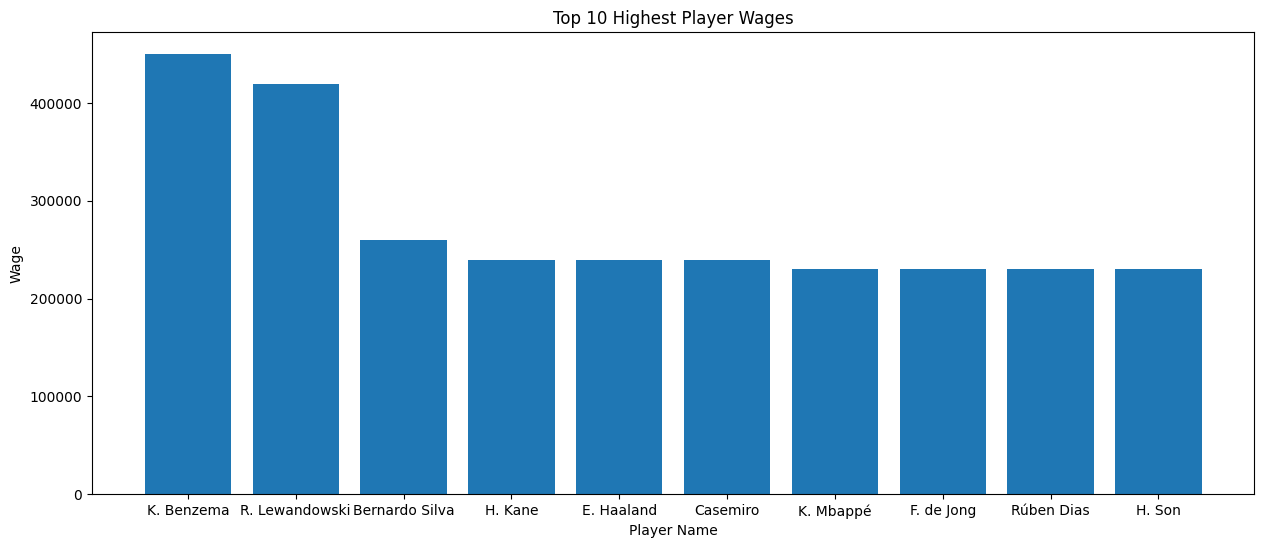

In [229]:
# Sort DataFrame by wage in descending order and select top 10
top_10_wages = df.sort_values(by='Wage', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(top_10_wages['Name'], top_10_wages['Wage'])
plt.xlabel('Player Name')
plt.ylabel('Wage')
plt.title('Top 10 Highest Player Wages')

2. List out the Top 10 Players according to their POT

Text(0.5, 1.0, 'Top 10 Highest POT')

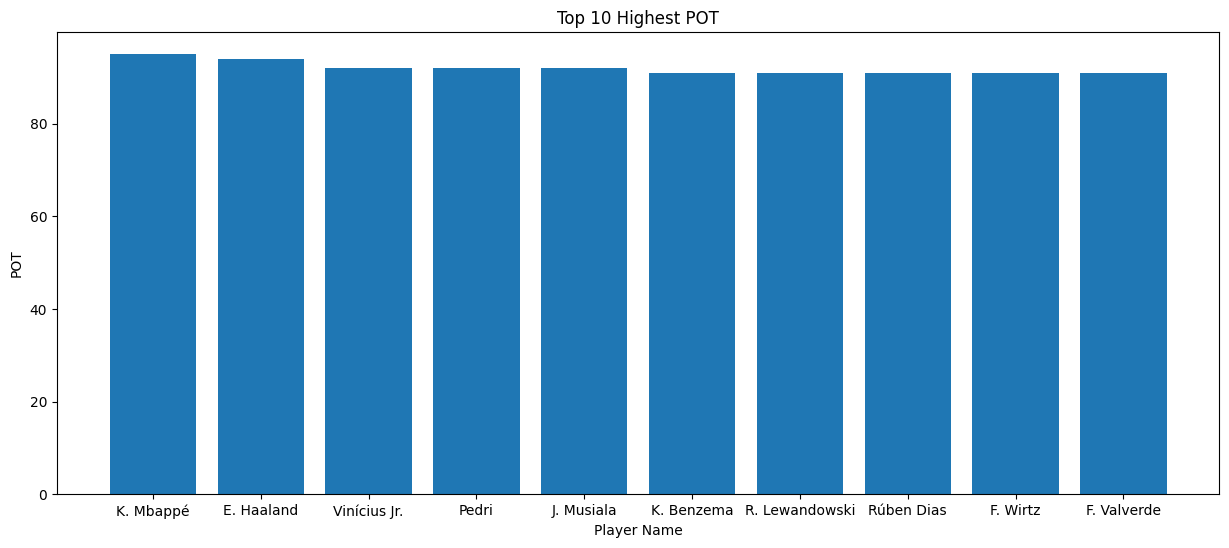

In [231]:
# Sort DataFrame by wage in descending order and select top 10
top_10_POT = df.sort_values(by='POT', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(top_10_POT['Name'], top_10_POT['POT'])
plt.xlabel('Player Name')
plt.ylabel('POT')
plt.title('Top 10 Highest POT')

3. Find out all the Youngest Players

In [237]:
youngest_player=[df[df['Starting Year'] == 2023]['Name']]
youngest_player

[23         A. Ezzalzouli
 36             M. Mudryk
 45            N. Madueke
 47            F. Balogun
 61     Cristiano Ronaldo
              ...        
 560           M. Retegui
 561        K. Çalhanoğlu
 564       Antonio Blanco
 567       M. Cancellieri
 568           C. Bradley
 Name: Name, Length: 85, dtype: object]

4. Find the Player(s) whose potential is more than 90

In [240]:
df[df['POT']>90]['Name']

22      J. Bellingham
29         E. Haaland
31           L. Messi
38          K. Mbappé
86           F. Wirtz
93       Vinícius Jr.
201        J. Musiala
238        K. Benzema
250       F. Valverde
331             Pedri
411    R. Lewandowski
419        Rúben Dias
Name: Name, dtype: object

5. Find the Player(s) whose potential is more than 90 but the age < 20

In [252]:
df[(df['POT']>90) & (df['Age']<20)]['Name']

22     J. Bellingham
86          F. Wirtz
201       J. Musiala
331            Pedri
Name: Name, dtype: object

In [241]:
# Finding correlation between all the attributes
df.corr()

<ipython-input-241-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,OVA,POT,Total_stats,Starting Year,Ending Year,Value,Wage,Duration
Age,1.000000,0.702314,-0.098883,0.445837,-0.159157,-0.158585,0.375729,0.574237,0.099530
OVA,0.702314,1.000000,0.470851,0.623929,0.012833,0.022920,0.800824,0.717985,0.333572
POT,-0.098883,0.470851,1.000000,0.270959,0.225512,0.242744,0.683461,0.433616,0.301894
Total_stats,0.445837,0.623929,0.270959,1.000000,0.000656,0.006602,0.523187,0.495416,0.192572
Starting Year,-0.159157,0.012833,0.225512,0.000656,1.000000,0.999978,0.136298,0.122176,0.367874
Ending Year,-0.158585,0.022920,0.242744,0.006602,0.999978,1.000000,0.148923,0.130201,0.373996
Value,0.375729,0.800824,0.683461,0.523187,0.136298,0.148923,1.000000,0.761105,0.369966
Wage,0.574237,0.717985,0.433616,0.495416,0.122176,0.130201,0.761105,1.000000,0.340573
Duration,0.099530,0.333572,0.301894,0.192572,0.367874,0.373996,0.369966,0.340573,1.000000


<ipython-input-242-c13c3c0f073b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Greens')


<Axes: >

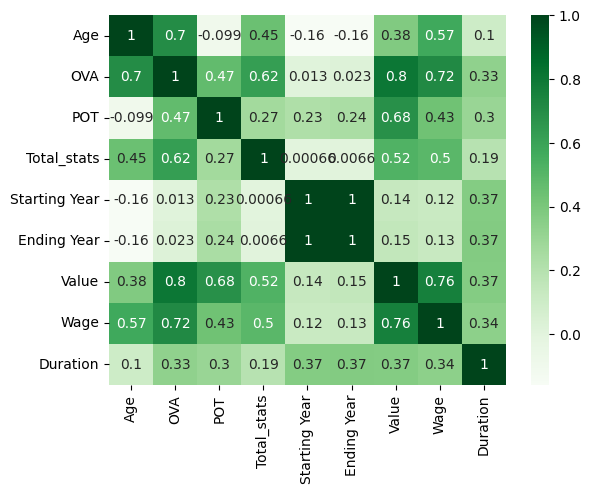

In [242]:
# Plotting correlation
sns.heatmap(df.corr(), annot=True, cmap='Greens')